# import

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
Q1 = pd.read_excel('Task Mathematician.xlsx', sheet_name='RS_01')
Q2 = pd.read_excel('Task Mathematician.xlsx', sheet_name='RS_02')

In [17]:
Q1.head(10)

,Position,Reel 1,Reel 2,Reel 3,Reel 4
0,0,O,O,O,O
1,1,O,O,O,O
2,2,O,O,O,O
3,3,O,O,O,O
4,4,O,O,O,O
5,5,O,O,O,O
6,6,O,O,O,O
7,7,O,O,O,O
8,8,O,O,O,O
9,9,X,X,X,X


# **Q1** Task

In [18]:
lengths = []
for i in range(1, 5):
    lengths.append(len(Q1[f"Reel {i}"]))

print(lengths, sep = ", ")
n = 100

[100, 100, 100, 100]


**P_i** is the random variable with Uniform distribution

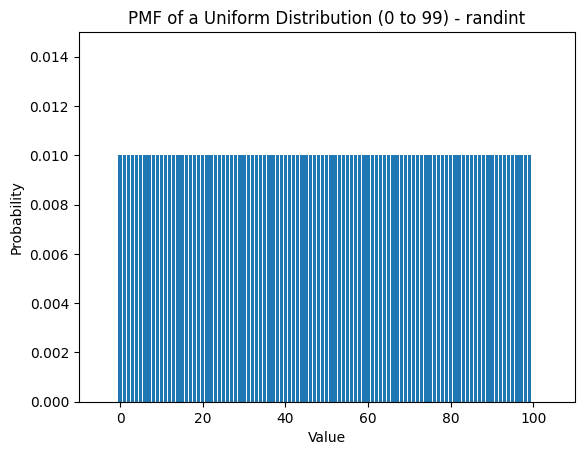

In [19]:
values = range(100)
probabilities = [1/100] * 100  # Probability of 1% for each value

plt.bar(values, probabilities)
plt.title('PMF of a Uniform Distribution (0 to 99) - randint')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.xlim([-10, 110])
plt.ylim([0, 0.015])
plt.show()

every starting index **P** has same probability of occurring, **P_i** completely describe how much Xs we get in one **column_i** of the matrix:

In [20]:
N = 4 #4 columns
count_X = np.zeros((n, N))

for i in range(N):
    for P in range(n):
        count_X[P, i] = sum([Q1[f"Reel {i+1}"][(P+j)%n] == "X" for j in range(N)])

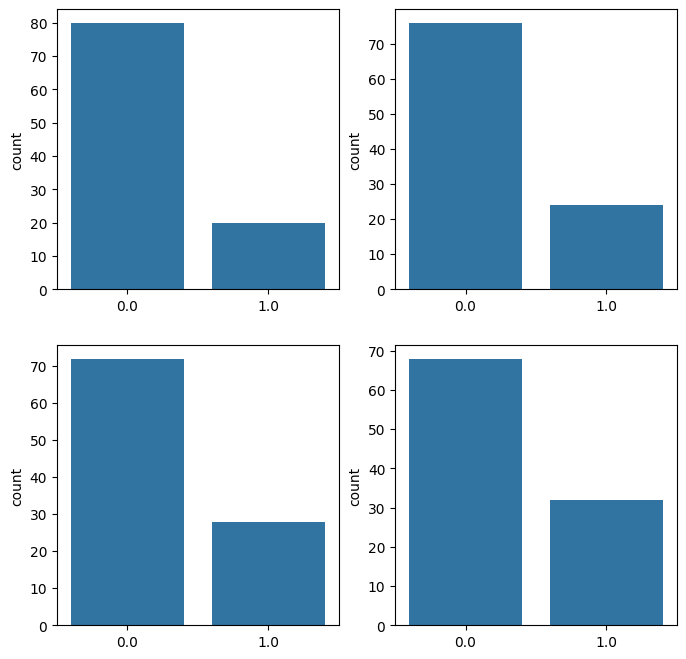

In [21]:
plt.figure(figsize = (8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = count_X[:, i])
plt.show()

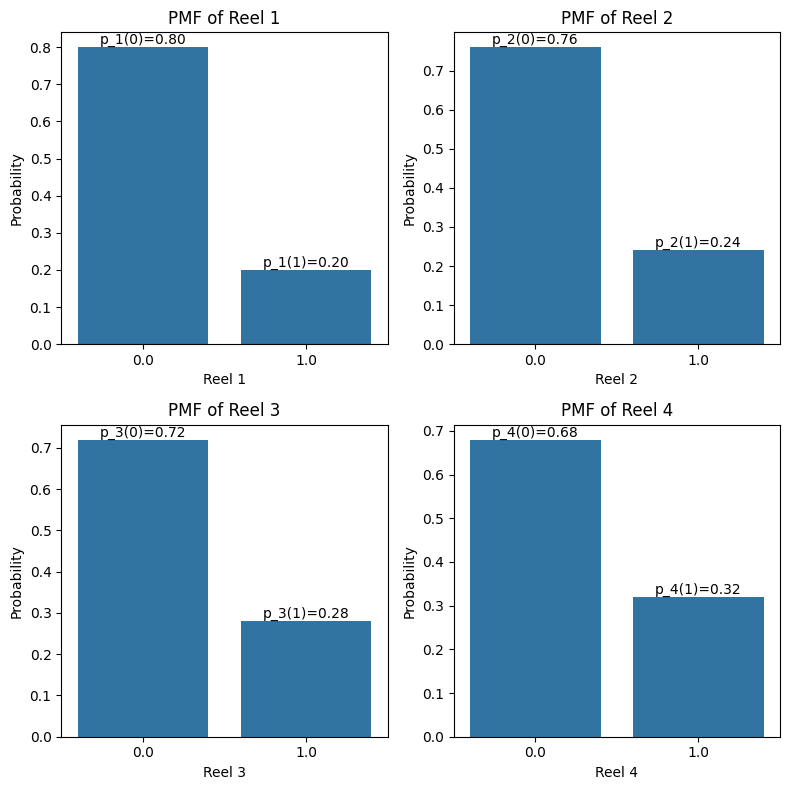

In [22]:
plt.figure(figsize=(8, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)

    unique, counts = np.unique(count_X[:, i], return_counts=True)
    probabilities = counts / n

    barplot = sns.barplot(x=unique, y=probabilities)
    plt.xlabel(f'Reel {i+1}')
    plt.ylabel('Probability')
    plt.title(f'PMF of Reel {i+1}')

    for j, (bar, probability) in enumerate(zip(barplot.patches, probabilities)):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'p_{i+1}({1 if j else 0})={probability:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Because only one X can be found in one matrix column, then we can also calculate p like this:

In [23]:
p = [4*(Q1[f"Reel {i}"] == 'X').sum()/100 for i in range(1, 5)]
p

[0.2, 0.24, 0.28, 0.32]

- There are 4 different independent reels in this sheet (i = range(1, 5)), each consists of 100 elements
- **column_i** is the spin of **reel_i**, it is completely determined by **P_i**
- **P_i** is the starting index of a **column_i** inside **reel_i**
- In the **Q1** task in **column_i** can be at most **one X**
- **p_i** is the probability of getting **exactly one X** in **column_i**, and **1-p_i** is the probability of getting **exactly zero Xs** in **column_i**

 - By definition:
# E[W] = ∑ w_j * P(W = w_j)

Where w_j is specific value for WIN, (W = X^2)

There are exactly 16 of combinations for getting Xs in Q1:
- X can be found in **all columns** and with probability of **p1 * p2 * p3 * p4**, WIN will be 4^2 = 16
- X can be found in **first 3 columns only** and with probability of **p1 * p2 * p3 * (1-p4)**, WIN will be 3^2 == 9
- ...
- ...
- There is zero Xs in the whole matrix with probability of: **(1-p1) * (1-p2) * (1-p3) * (1-p4)**, WIN will be 0^2 == 0

- ### So w_j can have values: 0, 1, 4, 9, 16


In [24]:
def calculate_expected_win_amount_brute_force(p):
    E_W = 0
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    E_W +=  (p[0] if i else 1-p[0])*(p[1] if j else 1-p[1])*(p[2] if k else 1-p[2])*(p[3] if l else 1-p[3])*(i+j+k+l)**2
    return E_W

print(calculate_expected_win_amount_brute_force(p))

def calculate_expected_win_amount_backtracking(p):
    E_W = 0
    def backtracking( i = 0 , current_base = 1, Xs_so_far = 0):
        nonlocal E_W
        if i == 4:
            E_W += current_base*Xs_so_far**2
        else:
            backtracking(i+1, current_base*p[i], Xs_so_far + 1)
            backtracking(i+1, current_base*(1-p[i]), Xs_so_far)

    backtracking()
    return E_W

print(calculate_expected_win_amount_backtracking(p))

def calculate_expected_win_amount_with_binary(p):
    E_W = 0
    for i in range(16):
        binary = list(format(i, "04b"))
        temp_p = 1

        for j, b in enumerate(binary):
            temp_p *= (p[j] if int(binary[j]) else 1 - p[j])
        E_W += temp_p*sum([int(b) for b in binary])**2

    return E_W

print(calculate_expected_win_amount_with_binary(p))

1.8432
1.8432
1.8432


Result for the **Q1** is 1.8432 for theoretical E[W]

# Task Q2

In [25]:
count_X = np.zeros((n, N))

for i in range(N):
    for P in range(n):
        count_X[P, i] = sum([Q2[f"Reel {i+1}"][(P+j)%n] == "X" for j in range(N)])

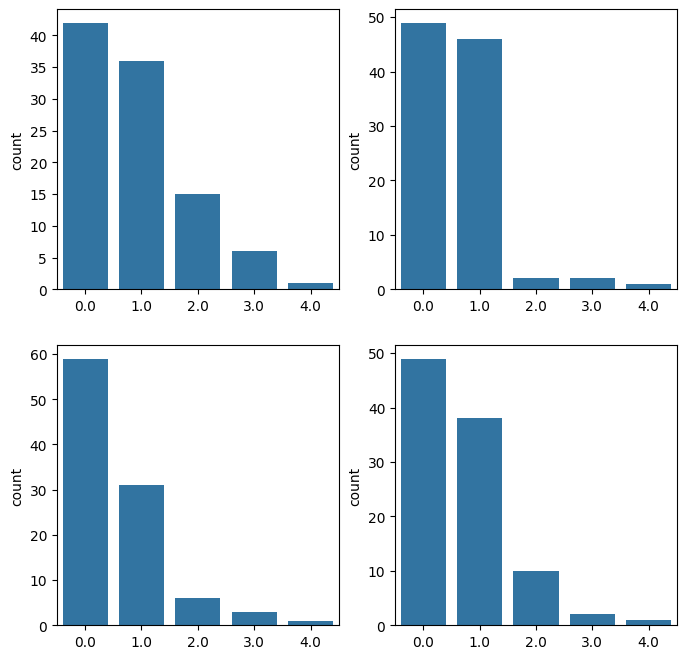

In [26]:
plt.figure(figsize = (8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = count_X[:, i])
plt.show()

We see that in this case in every column_i we can have 0, 1, 2, 3, or 4 X.

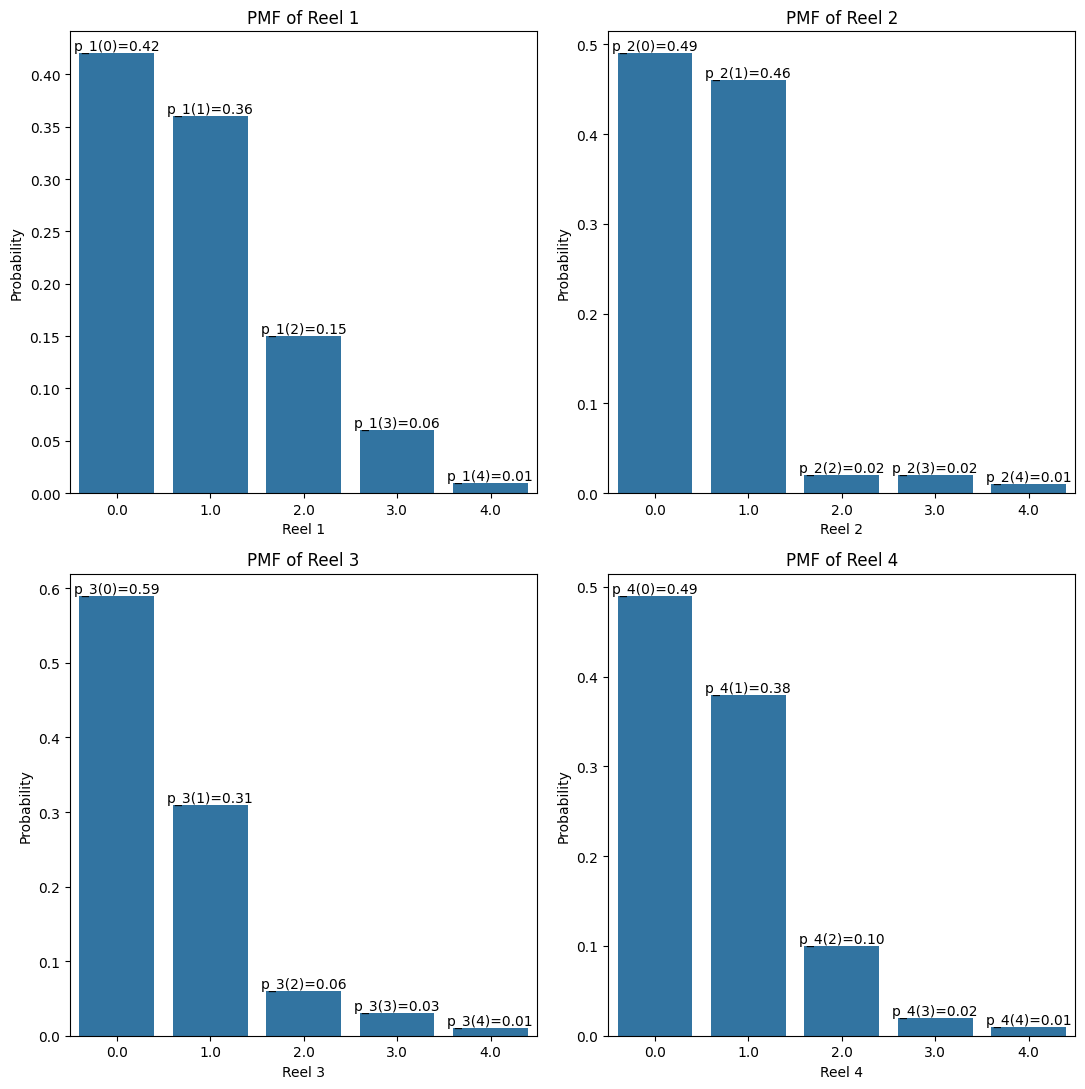

In [27]:
plt.figure(figsize=(11, 11))

for i in range(4):
    plt.subplot(2, 2, i+1)

    unique, counts = np.unique(count_X[:, i], return_counts=True)
    probabilities = counts / n

    barplot = sns.barplot(x=unique, y=probabilities)
    plt.xlabel(f'Reel {i+1}')
    plt.ylabel('Probability')
    plt.title(f'PMF of Reel {i+1}')

    for j, (bar, probability) in enumerate(zip(barplot.patches, probabilities)):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'p_{i+1}({j})={probability:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [28]:
def initialize(R):
    Q = pd.read_excel('Task Mathematician.xlsx', sheet_name=R)
    N = 4 #4 reels as input
    probs = []
    unique_X = []

    for i in range(N):
        n_temp = len(Q[f"Reel {i+1}"])
        count_X_temp = [0]*n_temp
        for P in range(100):
            count_X_temp[P] = sum([Q[f"Reel {i+1}"][(P+j)%n] == "X" for j in range(N)])
        unique, counts = np.unique(count_X_temp, return_counts=True)
        probabilities = counts / n_temp

        probs.append(probabilities)
        unique_X.append(unique)

    return unique_X, probs

def calculate_theoretical_win_amount(R):
    unique_X, probs = initialize(R)

    print(probs)
    print(unique_X)

    E_W = 0
    def backtracking( i = 0, current_prob = 1, current_Xs = 0):
        nonlocal E_W
        if i == 4:
            E_W += current_prob*current_Xs**2
        else:
            for j in range(len(unique_X[i])):
                backtracking(i + 1, current_prob*probs[i][j], current_Xs + unique_X[i][j])

    backtracking()
    return E_W


calculate_theoretical_win_amount('RS_02'), calculate_theoretical_win_amount('RS_01')

[array([0.42, 0.36, 0.15, 0.06, 0.01]), array([0.49, 0.46, 0.02, 0.02, 0.01]), array([0.59, 0.31, 0.06, 0.03, 0.01]), array([0.49, 0.38, 0.1 , 0.02, 0.01])]
[array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4])]
[array([0.8, 0.2]), array([0.76, 0.24]), array([0.72, 0.28]), array([0.68, 0.32])]
[array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]


(10.127999999999991, 1.8432000000000004)

We see somewhat strange results, for example theoretical E[W] for 'RS_01' is 1.8432 but we get here 1.8432000000000004

In [29]:
def smart_round(number):
    e = 0.00000000000001
    for decimal_places in range(1, 11):
        if abs(round(number, decimal_places) - number) < e:
            return round(number, decimal_places)
    return number
smart_round(1.8432000000000004), smart_round(10.127999999999991), smart_round(2.432452354130011)

(1.8432, 10.128, 2.432452354130011)

These are final results:

In [30]:
smart_round(calculate_theoretical_win_amount('RS_02')), smart_round(calculate_theoretical_win_amount('RS_01'))

[array([0.42, 0.36, 0.15, 0.06, 0.01]), array([0.49, 0.46, 0.02, 0.02, 0.01]), array([0.59, 0.31, 0.06, 0.03, 0.01]), array([0.49, 0.38, 0.1 , 0.02, 0.01])]
[array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4])]
[array([0.8, 0.2]), array([0.76, 0.24]), array([0.72, 0.28]), array([0.68, 0.32])]
[array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]


(10.128, 1.8432)

Final result for E[W] in **Q2** is 10.128

# Task Q3

In [31]:
#randint
np.unique(np.random.randint(100, size = 10000), return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([101, 105, 109,  89, 108,  93, 108, 100, 108, 106, 115, 113,  83,
        110, 100, 100,  98,  87,  81,  89, 103, 106, 103, 110, 107, 115,
         92, 102, 108,  96,  96, 102,  88, 104, 109,  97, 118,  97,  95,
         93, 107, 109,  92, 110, 113,  80,  98, 105,  90,  90, 110,  86,
        102, 102, 111, 103,  90, 103, 105, 101,  98, 106,  85,  93, 102,
         92,  76, 105,  93, 106, 102, 102, 101, 110, 104,  88,  99,  85,
         92, 104, 106,  97,  95, 102,  92, 101, 101, 100,  90,  91, 106,
         98, 115,  88,  97,  94, 110, 1

In [32]:
def estimate_win_amount(M, R):
    Q = pd.read_excel('Task Mathematician.xlsx', sheet_name=R)
    N, n = 4, 100

    Iterations = M
    E_W_estimation = np.zeros(M)

    for m in range(Iterations):
        number_of_Xs = 0
        for i in range(N):
            P = np.random.randint(100)
            number_of_Xs += sum([Q[f"Reel {i+1}"][(P+j)%n] == "X" for j in range(N)])
        E_W_estimation[m] = number_of_Xs**2

    return E_W_estimation.mean(), E_W_estimation.std()

estimate_win_amount(10000, 'RS_02'), estimate_win_amount(10000, 'RS_01')

((10.1645, 11.761523700184428), (1.8138, 2.4039820215633894))

## analysis of estimation

In [33]:
def analize_estimation(R):
    M_list = np.arange(1000, 30000, 1000)
    E_list, Std_list = np.zeros(len(M_list)), np.zeros(len(M_list))
    for i, M in enumerate(M_list):
        E_list[i], Std_list[i] = estimate_win_amount(M, R)


    plt.figure(figsize = (11, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(M_list, E_list)
    plt.title("E[W] estimated")
    plt.xlabel("M")
    plt.axhline(calculate_theoretical_win_amount(R))
    plt.legend(["estimation(M)", "True value"])
    plt.subplot(1,2,2)
    plt.scatter(M_list, Std_list)
    plt.xlabel("M")
    plt.title("std of estimation")
    plt.show()

    return E_list.mean()

[array([0.8, 0.2]), array([0.76, 0.24]), array([0.72, 0.28]), array([0.68, 0.32])]
[array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]


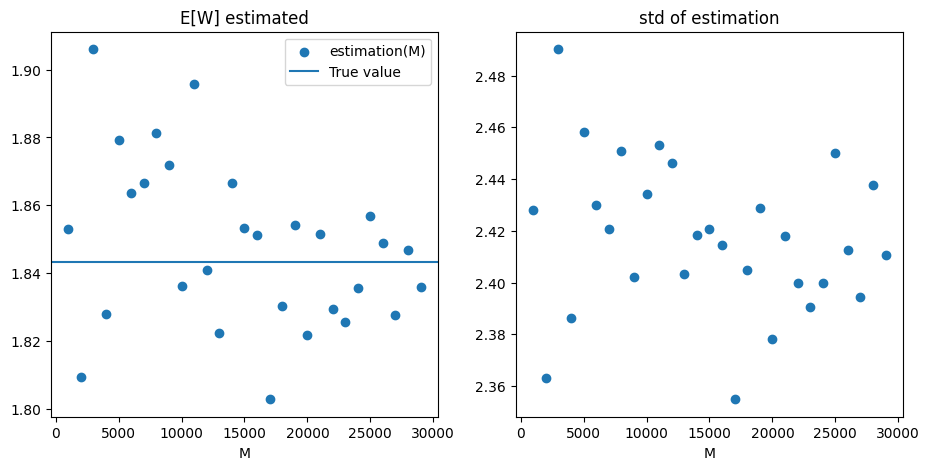

[array([0.42, 0.36, 0.15, 0.06, 0.01]), array([0.49, 0.46, 0.02, 0.02, 0.01]), array([0.59, 0.31, 0.06, 0.03, 0.01]), array([0.49, 0.38, 0.1 , 0.02, 0.01])]
[array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4])]


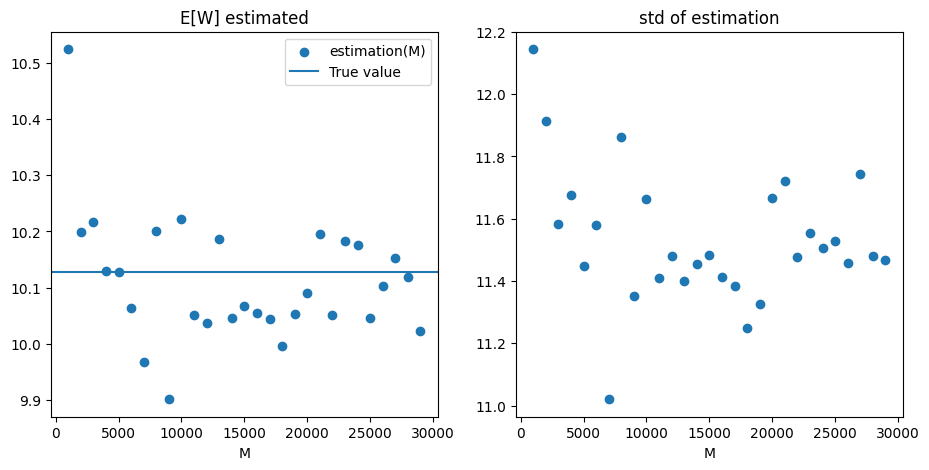

(1.8480630694010665, 10.111581954944437)

In [34]:
import warnings
warnings.filterwarnings('ignore')

analize_estimation('RS_01'), analize_estimation('RS_02')

As expected the bigger the M is we are closer to the theoretical E[W]

# Task Q4

We just need to multiply squared sum of largest  posible quantity of Xs in all columns by probabilities of getting largest quantity of Xs in each column.

In [35]:
def calculate_W_max_and_P_W_max(R):
    unique_X, probs = initialize(R)
    #print(unique_X, probs)
    return sum([Xs[-1] for Xs in unique_X])**2, np.prod([ps[-1] for ps in probs])

calculate_W_max_and_P_W_max('RS_01'), calculate_W_max_and_P_W_max('RS_02')

((16, 0.0043008000000000005), (256, 1.0000000000000002e-08))

In [36]:
Wmax1, P_Wmax1 = [smart_round(n) for n in calculate_W_max_and_P_W_max('RS_01')]
Wmax2, P_Wmax2 = [smart_round(n) for n in calculate_W_max_and_P_W_max('RS_02')]

print("result for sheet1: max posible WIN =", Wmax1, "probability for that", P_Wmax1)
print("result for sheet2: max posible WIN =", Wmax2, "probability for that", P_Wmax2)

result for sheet1: max posible WIN = 16 probability for that 0.0043008
result for sheet2: max posible WIN = 256 probability for that 1e-08
